In [1]:
import math
import cv2
import numpy as np 
import mediapipe as mp
import matplotlib.pyplot as plt

In [2]:
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, model_complexity=2, min_detection_confidence=0.3)
mp_drawing = mp.solutions.drawing_utils

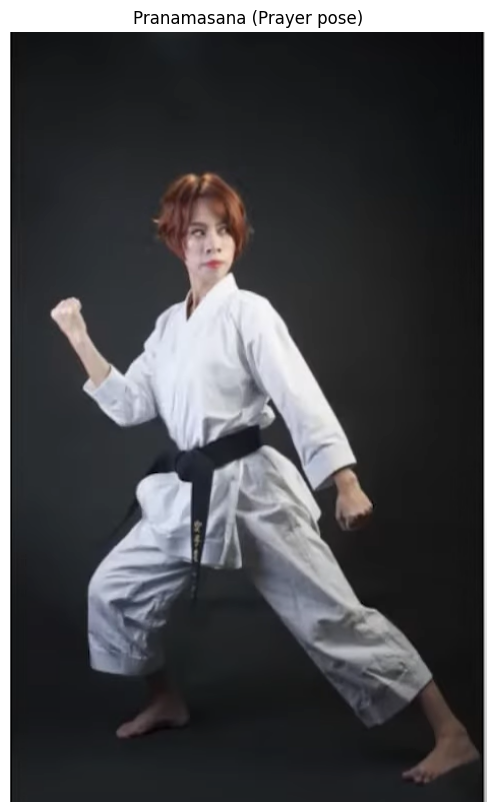

In [3]:
sample_img = cv2.imread("sample.png")
plt.figure(figsize=(10,10))
plt.title("Pranamasana (Prayer pose)")
plt.axis("off")
plt.imshow(sample_img[:,:,::-1])
plt.show()


In [4]:
results = pose.process(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))
if results.pose_landmarks:
    for i in range(33): # all 33 landmarks
        print(f'{mp_pose.PoseLandmark(i).name} : {results.pose_landmarks.landmark[i]}')

NOSE : x: 0.41704363
y: 0.27792144
z: -0.81798637
visibility: 1.0

LEFT_EYE_INNER : x: 0.42886782
y: 0.25987914
z: -0.78091455
visibility: 1.0

LEFT_EYE : x: 0.4439677
y: 0.2589552
z: -0.7817626
visibility: 1.0

LEFT_EYE_OUTER : x: 0.4544579
y: 0.25825676
z: -0.78150755
visibility: 1.0

RIGHT_EYE_INNER : x: 0.39292112
y: 0.26118633
z: -0.7378229
visibility: 1.0

RIGHT_EYE : x: 0.3815694
y: 0.2620433
z: -0.7384666
visibility: 0.9999999

RIGHT_EYE_OUTER : x: 0.37076536
y: 0.26295626
z: -0.73866403
visibility: 0.9999999

LEFT_EAR : x: 0.46604812
y: 0.26591706
z: -0.52699524
visibility: 1.0

RIGHT_EAR : x: 0.35284314
y: 0.2719686
z: -0.32626134
visibility: 0.9999994

MOUTH_LEFT : x: 0.4416291
y: 0.2934818
z: -0.7162786
visibility: 0.99999976

MOUTH_RIGHT : x: 0.39918166
y: 0.2953492
z: -0.66364306
visibility: 0.9999995

LEFT_SHOULDER : x: 0.5114557
y: 0.36527592
z: -0.5242953
visibility: 0.9999988

RIGHT_SHOULDER : x: 0.33794844
y: 0.3869161
z: 0.12367251
visibility: 0.999884

LEFT_ELBOW :

In [5]:
image_height, image_width, _ = sample_img.shape
if results.pose_landmarks:
    for i in range(33):
        print(f'mp_pose.PoseLandmark(i).name : {mp_pose.PoseLandmark(i).name}')
        print(f'x : {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].x * image_width}')
        print(f'y : {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].y * image_height}')
        print(f'z : {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].z * image_width}')
        print(f'visibility : {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].visibility}')

mp_pose.PoseLandmark(i).name : NOSE
x : 195.5934607386589
y : 210.66445016860962
z : -383.63560712337494
visibility : 1.0
mp_pose.PoseLandmark(i).name : LEFT_EYE_INNER
x : 201.1390061378479
y : 196.98838967084885
z : -366.2489216327667
visibility : 1.0
mp_pose.PoseLandmark(i).name : LEFT_EYE
x : 208.2208513021469
y : 196.28804951906204
z : -366.64665937423706
visibility : 1.0
mp_pose.PoseLandmark(i).name : LEFT_EYE_OUTER
x : 213.14075925946236
y : 195.7586265206337
z : -366.5270417332649
visibility : 1.0
mp_pose.PoseLandmark(i).name : RIGHT_EYE_INNER
x : 184.28000524640083
y : 197.97923928499222
z : -346.0389355421066
visibility : 1.0
mp_pose.PoseLandmark(i).name : RIGHT_EYE
x : 178.95604181289673
y : 198.62881934642792
z : -346.34084498882294
visibility : 0.9999998807907104
mp_pose.PoseLandmark(i).name : RIGHT_EYE_OUTER
x : 173.88895300030708
y : 199.3208463191986
z : -346.4334305524826
visibility : 0.9999998807907104
mp_pose.PoseLandmark(i).name : LEFT_EAR
x : 218.5765689611435
y : 2

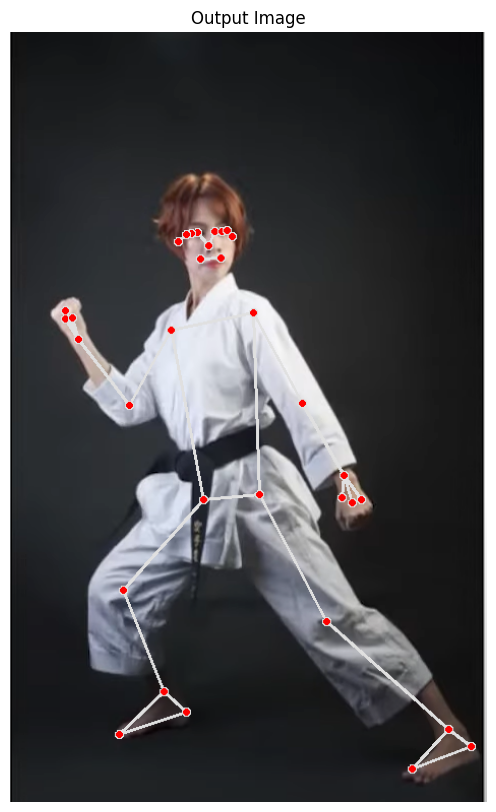

In [6]:
if results.pose_landmarks:
    mp_drawing.draw_landmarks(image = sample_img, landmark_list=results.pose_landmarks, connections=mp_pose.POSE_CONNECTIONS)
    fig = plt.figure(figsize=(10,10))
    plt.title("Output Image")
    plt.axis("off")
    plt.imshow(sample_img[:,:,::-1])
    plt.show()

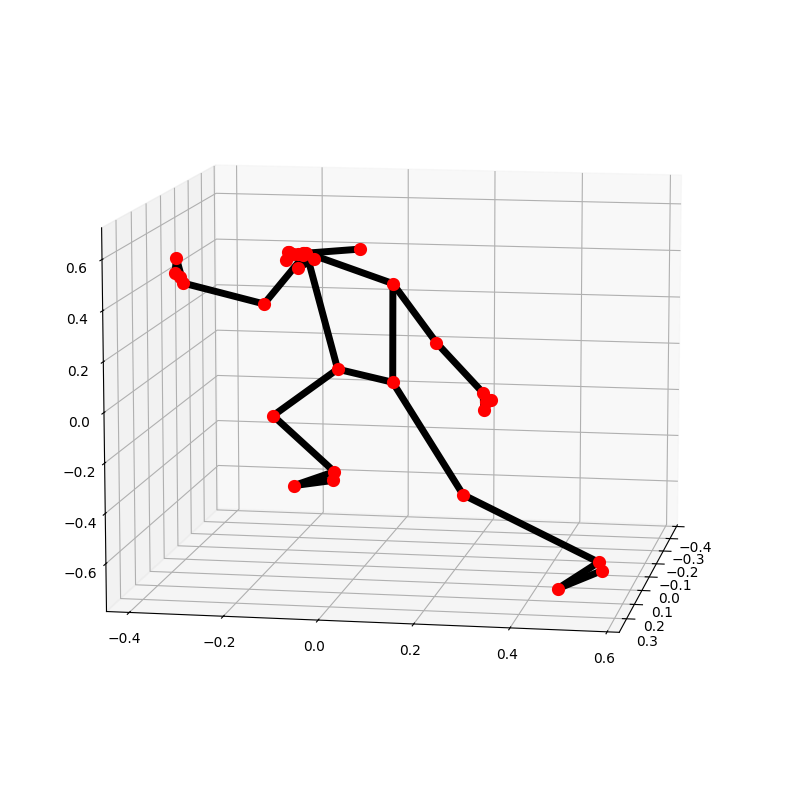

In [7]:
mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)

In [8]:
def calculate_angle(landmark1, landmark2, landmark3):
    a = np.array(landmark1)
    b = np.array(landmark2)
    c = np.array(landmark3)
    ba = a - b
    bc = c - b
    ba_norm = ba / np.linalg.norm(ba)
    bc_norm = bc / np.linalg.norm(bc)
    cosine_angle = np.dot(ba_norm, bc_norm)
    cosine_angle = np.clip(cosine_angle, -1.0, 1.0)
    angle = np.arccos(cosine_angle)
    return np.degrees(angle)

In [9]:
def calculate_angle_2d(landmark1, landmark2, landmark3):
    x1, y1, _ = landmark1
    x2, y2, _ = landmark2
    x3, y3, _ = landmark3
    angle = math.degrees(math.atan2(y3 - y2, x3 - x2) - math.atan2(y1 - y2, x1 - x2))
    if angle < 0:
        angle += 360
    return angle

In [10]:
def checkTreePose(landmarks, output_image, display=False):
    pose = "Unknown Pose"
    color = (0,0,255)
    left_knee_angle = calculate_angle_2d(landmarks[mp_pose.PoseLandmark.LEFT_HIP.value],
                                      landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value],
                                      landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value])
    right_knee_angle = calculate_angle_2d(landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                      landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value],
                                      landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value])
    # check for tree pose
    if left_knee_angle > 165 and left_knee_angle < 195:
        if (right_knee_angle > 25 and right_knee_angle < 45) or (right_knee_angle > 315 and right_knee_angle < 335):
            pose = "Tree Pose"
    if right_knee_angle > 165 and right_knee_angle < 195:
        if (left_knee_angle > 25 and left_knee_angle < 45) or (left_knee_angle > 315 and left_knee_angle < 335):
            pose = "Correct Tree Pose"
    if(pose!="Not a Tree Pose"):
        color = (0,255,0)
    cv2.putText(output_image, pose, (10,30), cv2.FONT_HERSHEY_PLAIN, 2, color, 2)
    if display:
        plt.figure(figsize=[10,10])
        plt.title("Output Image")
        plt.axis("off")
        plt.imshow(output_image[:,:,::-1])
        plt.show()
        print(left_knee_angle, right_knee_angle)
    else:
        return output_image, pose

In [26]:
def detectPose(image, pose, display=True):
    output_image = image.copy()
    imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = pose.process(imageRGB)
    height, width, _ = image.shape
    landmarks = []
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(image=output_image, landmark_list=results.pose_landmarks, connections=mp_pose.POSE_CONNECTIONS)
        for landmark in results.pose_landmarks.landmark:
            landmarks.append((int(landmark.x * width), int(landmark.y * height),(landmark.z * width)))
    mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)
    if display:
        plt.figure(figsize=[22,22])
        plt.subplot(121)
        plt.imshow(image[:,:,::-1])
        plt.title("Original Image")
        plt.axis("off")
        plt.subplot(122)
        plt.imshow(output_image[:,:,::-1])
        plt.title("Output Image")
        plt.axis("off")
        plt.show()
        mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)
    else:
        return output_image, landmarks

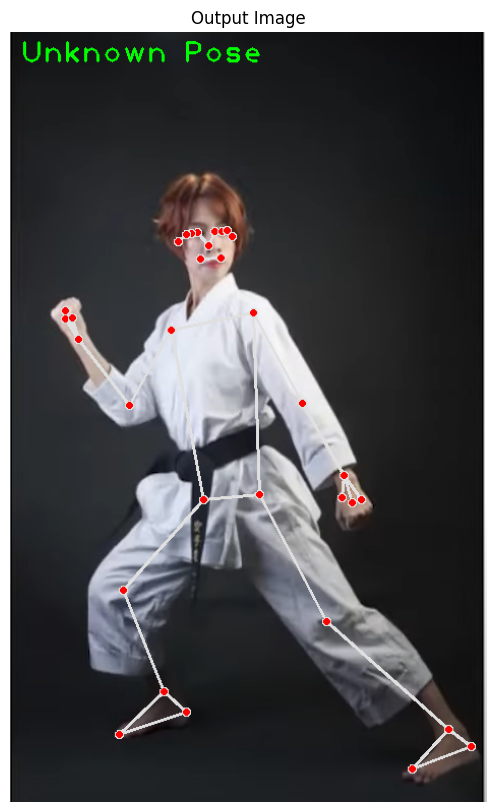

159.28928748495593 116.60503426864291


In [12]:
image = cv2.imread("sample.png")
output_image, landmarks = detectPose(image, pose, display=False)
if landmarks:
    checkTreePose(landmarks, output_image, display=True)

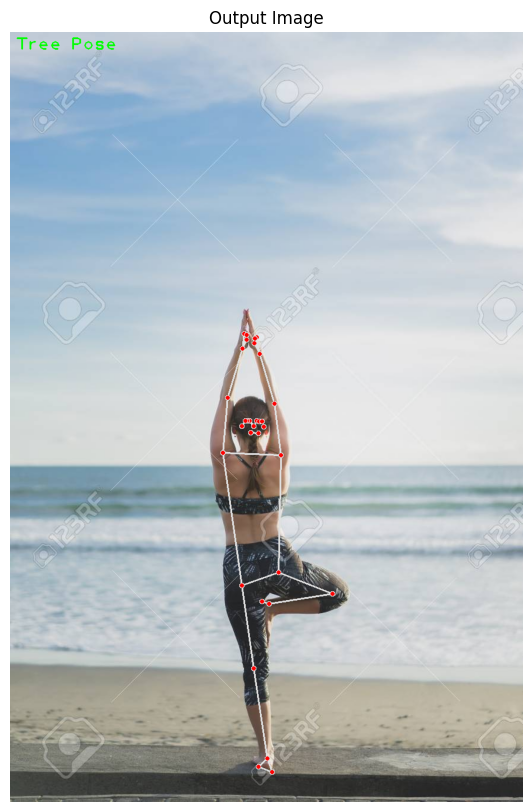

179.52562076106335 329.3884178075153


In [13]:
image = cv2.imread("tree.jpg")
output_image, landmarks = detectPose(image, pose, display=False)
if landmarks:
    checkTreePose(landmarks, output_image, display=True)

In [ ]:
def checkPranamasana(landmarks, output_image, display=False):
    pose = "Not a Pranamasana"
    color = (0, 0, 255)

    def lm(index):
        return landmarks[index]

    # Calculate joint angles
    left_elbow_angle = calculate_angle(lm(mp_pose.PoseLandmark.LEFT_SHOULDER.value),
                                       lm(mp_pose.PoseLandmark.LEFT_ELBOW.value),
                                       (113, 243,160))
    right_elbow_angle = calculate_angle(lm(mp_pose.PoseLandmark.RIGHT_SHOULDER.value),
                                        lm(mp_pose.PoseLandmark.RIGHT_ELBOW.value),
                                        lm(mp_pose.PoseLandmark.RIGHT_WRIST.value))
    left_shoulder_angle = calculate_angle(lm(mp_pose.PoseLandmark.LEFT_ELBOW.value),
                                          lm(mp_pose.PoseLandmark.LEFT_SHOULDER.value),
                                          lm(mp_pose.PoseLandmark.LEFT_HIP.value))
    right_shoulder_angle = calculate_angle(lm(mp_pose.PoseLandmark.RIGHT_ELBOW.value),
                                           lm(mp_pose.PoseLandmark.RIGHT_SHOULDER.value),
                                           lm(mp_pose.PoseLandmark.RIGHT_HIP.value))

    # Wrist positions
    left_wrist = lm(mp_pose.PoseLandmark.LEFT_WRIST.value)
    right_wrist = lm(mp_pose.PoseLandmark.RIGHT_WRIST.value)

    # Calculate wrist distance and vertical alignment
    wrist_distance = ((left_wrist[0] - right_wrist[0]) ** 2 + (left_wrist[1] - right_wrist[1]) ** 2) ** 0.5
    wrist_y_diff = abs(left_wrist[1] - right_wrist[1])

    # Shoulder and elbow Y (used for chest level check)
    left_shoulder_y = lm(mp_pose.PoseLandmark.LEFT_SHOULDER.value)[1]
    left_elbow_y = lm(mp_pose.PoseLandmark.LEFT_ELBOW.value)[1]

    # Compute image height
    image_height, _, _ = output_image.shape
    tolerance = image_height * 0.07  # ~7% of image height

    # Mid-chest level Y
    mid_chest_y = (left_shoulder_y + left_elbow_y) / 2
    wrists_at_chest_level = abs(left_wrist[1] - mid_chest_y) <= tolerance

    # Final pose decision
    if(left_elbow_angle>180):
        left_elbow_angle = 360 - left_elbow_angle
    if(right_elbow_angle>180):
        right_elbow_angle = 360 - right_elbow_angle
    if(left_shoulder_angle>180):
        left_shoulder_angle = 360 - left_shoulder_angle
    if(right_shoulder_angle>180):
        right_shoulder_angle = 360 - right_shoulder_angle
    if (
        75 <= left_elbow_angle <= 90 and
        75 <= right_elbow_angle <= 90 and
        30 <= left_shoulder_angle <= 60 and
        30 <= right_shoulder_angle <= 60 and
        wrist_distance < 50 and
        wrist_y_diff < 20 and
        wrists_at_chest_level
    ):
        pose = "Pranamasana (Prayer pose)"
        color = (0, 255, 0)
    # Show final output
    print("DEBUG:")
    print(f"Left Elbow Angle: {left_elbow_angle:.2f}")
    print(f"Right Elbow Angle: {right_elbow_angle:.2f}")
    print(f"Left Shoulder Angle: {left_shoulder_angle:.2f}")
    print(f"Right Shoulder Angle: {right_shoulder_angle:.2f}")
    print(f"Wrist Distance: {wrist_distance:.2f}")
    print(f"Wrist Y Diff: {wrist_y_diff}")
    print(f"Left Shoulder Y: {left_shoulder_y}")
    print(f"Left Elbow Y: {left_elbow_y}")
    print(f"Left Wrist Y: {left_wrist[1]}")
    print(f"Mid Chest Y: {mid_chest_y}")
    print(f"Tolerance: {tolerance}") 
    print(f"Wrists at Chest Level: {wrists_at_chest_level}")
    print(f"Left Shoulder: {landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value]}")
    print(f"Left Elbow: {landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value]}")
    print(f"Left Wrist: {landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value]}")
    print(f"Right Shoulder: {landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value]}")
    print(f"Right Elbow: {landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value]}")
    print(f"Right Wrist: {landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value]}")
    if display:
        plt.figure(figsize=[10, 10])
        plt.title(pose)
        plt.axis("off")
        plt.imshow(output_image[:, :, ::-1])
        plt.show()

    return pose


DEBUG:
Left Elbow Angle: 61.89
Right Elbow Angle: 78.89
Left Shoulder Angle: 36.02
Right Shoulder Angle: 31.79
Wrist Distance: 17.26
Wrist Y Diff: 3
Left Shoulder Y: 122
Left Elbow Y: 194
Left Wrist Y: 197
Mid Chest Y: 158.0
Tolerance: 25.200000000000003
Wrists at Chest Level: False
Left Shoulder: (336, 122, 77.18470305204391)
Left Elbow: (381, 194, 39.92515057325363)
Left Wrist: (290, 197, -26.27503551542759)
Right Shoulder: (229, 121, 62.18193992972374)
Right Elbow: (188, 203, 10.682457648217678)
Right Wrist: (273, 194, -33.464749082922935)


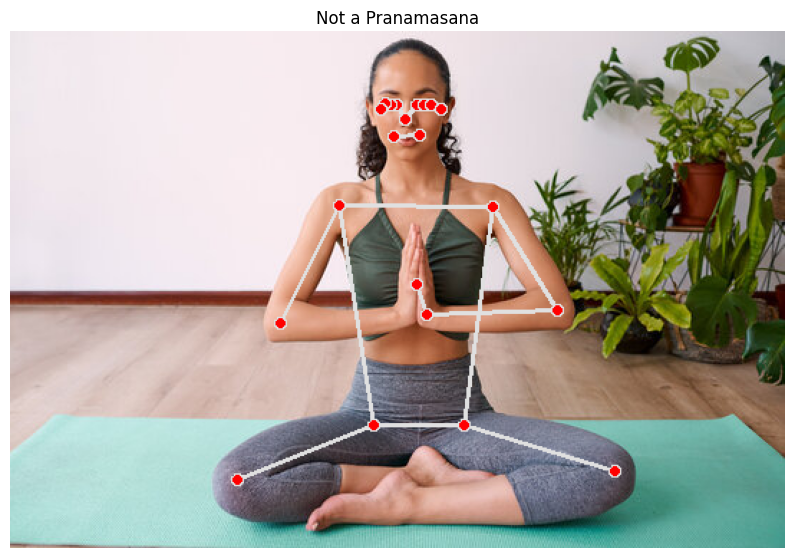

In [15]:
image = cv2.imread("SuryaNamaskar_Steps/1. Pranamasana (Prayer pose)/a.jpg")
output_image, landmarks = detectPose(image, pose, display=False)
if landmarks:
    checkPranamasana(landmarks, output_image, display=True)

In [20]:
def midpoint(p1, p2):
    return [(p1[0] + p2[0]) / 2, (p1[1] + p2[1]) / 2, (p1[2] + p2[2]) / 2]

In [24]:
def checkBhujangasana(landmarks, output_image, display=False):
    pose = "Not a Bhujangasana"
    color = (0, 0, 255) # Default color for incorrect pose (BGR)

    def lm(index):
        # Ensure landmarks[index] has at least x, y, z
        if hasattr(landmarks[index], 'x') and hasattr(landmarks[index], 'y') and hasattr(landmarks[index], 'z'):
            return [landmarks[index].x, landmarks[index].y, landmarks[index].z]
        else:
            # Fallback if landmarks are already arrays/lists without attributes
            return landmarks[index]

    # Helper function to compute midpoint
    def midpoint(p1, p2):
        return [(p1[0] + p2[0]) / 2, (p1[1] + p2[1]) / 2, (p1[2] + p2[2]) / 2]

    left_elbow_angle = calculate_angle(
        lm(mp_pose.PoseLandmark.LEFT_SHOULDER.value),
        lm(mp_pose.PoseLandmark.LEFT_ELBOW.value),
        lm(mp_pose.PoseLandmark.LEFT_WRIST.value)
    )
    right_elbow_angle = calculate_angle(
        lm(mp_pose.PoseLandmark.RIGHT_SHOULDER.value),
        lm(mp_pose.PoseLandmark.RIGHT_ELBOW.value),
        lm(mp_pose.PoseLandmark.RIGHT_WRIST.value)
    )

    left_shoulder_angle = calculate_angle(
        lm(mp_pose.PoseLandmark.LEFT_ELBOW.value),
        lm(mp_pose.PoseLandmark.LEFT_SHOULDER.value),
        lm(mp_pose.PoseLandmark.LEFT_HIP.value)
    )
    right_shoulder_angle = calculate_angle(
        lm(mp_pose.PoseLandmark.RIGHT_ELBOW.value),
        lm(mp_pose.PoseLandmark.RIGHT_SHOULDER.value),
        lm(mp_pose.PoseLandmark.RIGHT_HIP.value)
    )

    shoulder_center = midpoint(lm(mp_pose.PoseLandmark.LEFT_SHOULDER.value),
                                 lm(mp_pose.PoseLandmark.RIGHT_SHOULDER.value))
    hip_center = midpoint(lm(mp_pose.PoseLandmark.LEFT_HIP.value),
                           lm(mp_pose.PoseLandmark.RIGHT_HIP.value))
    knee_center = midpoint(lm(mp_pose.PoseLandmark.LEFT_KNEE.value),
                             lm(mp_pose.PoseLandmark.RIGHT_KNEE.value))

    hip_angle = calculate_angle(shoulder_center, hip_center, knee_center)

    avg_shoulder_y = (lm(mp_pose.PoseLandmark.LEFT_SHOULDER.value)[1] +
                      lm(mp_pose.PoseLandmark.RIGHT_SHOULDER.value)[1]) / 2
    avg_hip_y = (lm(mp_pose.PoseLandmark.LEFT_HIP.value)[1] +
                 lm(mp_pose.PoseLandmark.RIGHT_HIP.value)[1]) / 2

    torso_lift_pixels = avg_hip_y - avg_shoulder_y

    image_height, _, _ = output_image.shape
    torso_lift_ratio = torso_lift_pixels / image_height

    ELBOW_ANGLE_MIN = 100
    ELBOW_ANGLE_MAX = 160

    SHOULDER_ANGLE_MIN = 20
    SHOULDER_ANGLE_MAX = 60
    HIP_ANGLE_MIN = 160 # For a pose where hips are mostly on the ground
    HIP_ANGLE_MAX = 180
    TORSO_LIFT_RATIO_MIN = 0.10


    if (
        ELBOW_ANGLE_MIN <= left_elbow_angle <= ELBOW_ANGLE_MAX and
        ELBOW_ANGLE_MIN <= right_elbow_angle <= ELBOW_ANGLE_MAX and
        SHOULDER_ANGLE_MIN <= left_shoulder_angle <= SHOULDER_ANGLE_MAX and
        SHOULDER_ANGLE_MIN <= right_shoulder_angle <= SHOULDER_ANGLE_MAX and
        HIP_ANGLE_MIN <= hip_angle <= HIP_ANGLE_MAX and
        torso_lift_ratio >= TORSO_LIFT_RATIO_MIN
    ):
        pose = "Bhujangasana (Cobra Pose)"
        color = (0, 255, 0) # Green for correct pose

    print("--- Bhujangasana Analysis ---")
    print(f"Left Elbow Angle: {left_elbow_angle:.2f} (Target: {ELBOW_ANGLE_MIN}-{ELBOW_ANGLE_MAX})")
    print(f"Right Elbow Angle: {right_elbow_angle:.2f} (Target: {ELBOW_ANGLE_MIN}-{ELBOW_ANGLE_MAX})")
    print(f"Left Shoulder Angle: {left_shoulder_angle:.2f} (Target: {SHOULDER_ANGLE_MIN}-{SHOULDER_ANGLE_MAX})")
    print(f"Right Shoulder Angle: {right_shoulder_angle:.2f} (Target: {SHOULDER_ANGLE_MIN}-{SHOULDER_ANGLE_MAX})")
    print(f"Hip Angle: {hip_angle:.2f} (Target: {HIP_ANGLE_MIN}-{HIP_ANGLE_MAX})")
    print(f"Torso Lift Ratio: {torso_lift_ratio:.2f} (Target: >= {TORSO_LIFT_RATIO_MIN})")
    print(f"Pose Status: {pose}")
    print("----------------------------")


    if display:
        plt.figure(figsize=[10, 10])
        plt.title(pose)
        plt.axis("off")
        # OpenCV images are BGR, Matplotlib expects RGB
        plt.imshow(output_image[:, :, ::-1])
        plt.show()

    return pose

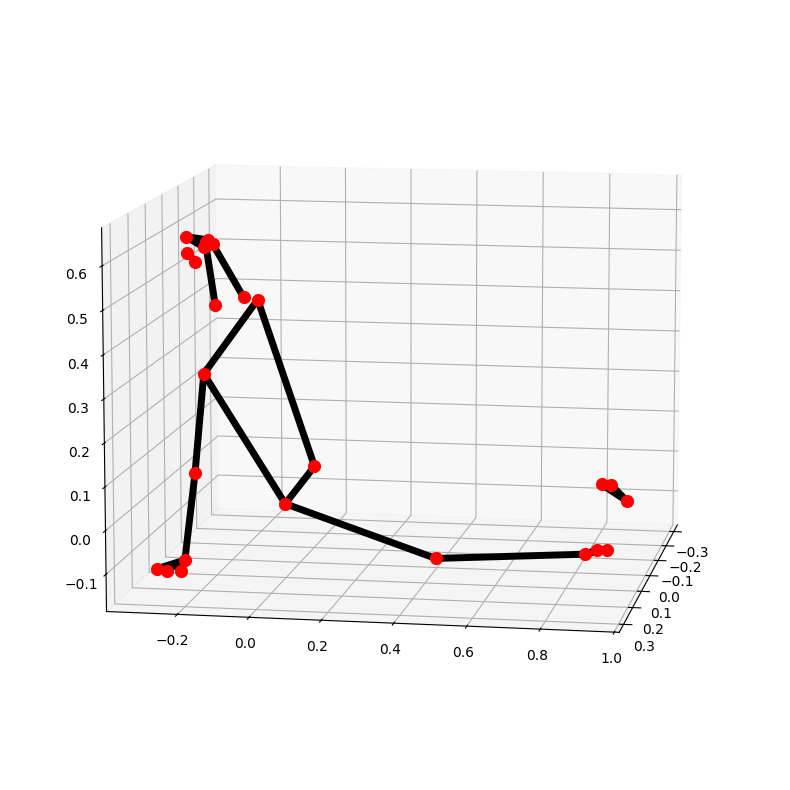

--- Bhujangasana Analysis ---
Left Elbow Angle: 164.72 (Target: 100-160)
Right Elbow Angle: 124.87 (Target: 100-160)
Left Shoulder Angle: 85.93 (Target: 20-60)
Right Shoulder Angle: 28.41 (Target: 20-60)
Hip Angle: 127.71 (Target: 160-180)
Torso Lift Ratio: 0.43 (Target: >= 0.1)
Pose Status: Not a Bhujangasana
----------------------------


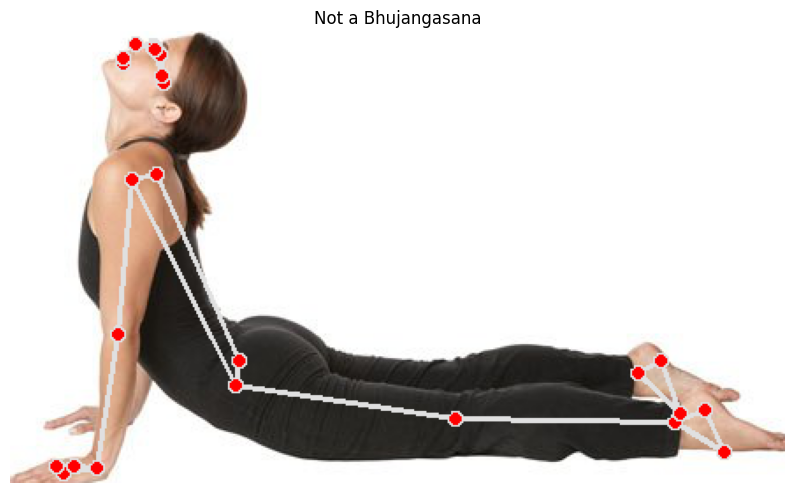

In [27]:
image = cv2.imread("SuryaNamaskar_Steps/7. Bhujangasana (Cobra pose)/6-0.png")
output_image, landmarks = detectPose(image, pose, display=False)
if landmarks:
    checkBhujangasana(landmarks, output_image, display=True)

In [1]:
def checkHastauttanasana(landmarks, output_image, display=False):
    pose = "Not a Hastauttanasana"
    color = (0, 0, 255) # Default color for incorrect pose (BGR)

    def lm(index):
        # Ensure landmarks[index] has at least x, y, z
        if hasattr(landmarks[index], 'x') and hasattr(landmarks[index], 'y') and hasattr(landmarks[index], 'z'):
            return [landmarks[index].x, landmarks[index].y, landmarks[index].z]
        else:
            # Fallback if landmarks are already arrays/lists without attributes
            return landmarks[index]

    # Helper function to compute midpoint
    def midpoint(p1, p2):
        return [(p1[0] + p2[0]) / 2, (p1[1] + p2[1]) / 2, (p1[2] + p2[2]) / 2]

    # Calculate shoulder angles (arms should be raised above head)
    left_shoulder_angle = calculate_angle(
        lm(mp_pose.PoseLandmark.LEFT_ELBOW.value),
        lm(mp_pose.PoseLandmark.LEFT_SHOULDER.value),
        lm(mp_pose.PoseLandmark.LEFT_HIP.value)
    )
    right_shoulder_angle = calculate_angle(
        lm(mp_pose.PoseLandmark.RIGHT_ELBOW.value),
        lm(mp_pose.PoseLandmark.RIGHT_SHOULDER.value),
        lm(mp_pose.PoseLandmark.RIGHT_HIP.value)
    )

    # Calculate elbow angles (arms should be straight)
    left_elbow_angle = calculate_angle(
        lm(mp_pose.PoseLandmark.LEFT_SHOULDER.value),
        lm(mp_pose.PoseLandmark.LEFT_ELBOW.value),
        lm(mp_pose.PoseLandmark.LEFT_WRIST.value)
    )
    right_elbow_angle = calculate_angle(
        lm(mp_pose.PoseLandmark.RIGHT_SHOULDER.value),
        lm(mp_pose.PoseLandmark.RIGHT_ELBOW.value),
        lm(mp_pose.PoseLandmark.RIGHT_WRIST.value)
    )

    # Calculate hip angles (should be straight)
    left_hip_angle = calculate_angle(
        lm(mp_pose.PoseLandmark.LEFT_SHOULDER.value),
        lm(mp_pose.PoseLandmark.LEFT_HIP.value),
        lm(mp_pose.PoseLandmark.LEFT_KNEE.value)
    )
    right_hip_angle = calculate_angle(
        lm(mp_pose.PoseLandmark.RIGHT_SHOULDER.value),
        lm(mp_pose.PoseLandmark.RIGHT_HIP.value),
        lm(mp_pose.PoseLandmark.RIGHT_KNEE.value)
    )

    # Calculate knee angles (should be straight)
    left_knee_angle = calculate_angle(
        lm(mp_pose.PoseLandmark.LEFT_HIP.value),
        lm(mp_pose.PoseLandmark.LEFT_KNEE.value),
        lm(mp_pose.PoseLandmark.LEFT_ANKLE.value)
    )
    right_knee_angle = calculate_angle(
        lm(mp_pose.PoseLandmark.RIGHT_HIP.value),
        lm(mp_pose.PoseLandmark.RIGHT_KNEE.value),
        lm(mp_pose.PoseLandmark.RIGHT_ANKLE.value)
    )

    # Calculate trunk angle (body should be straight with slight backbend)
    shoulder_center = midpoint(lm(mp_pose.PoseLandmark.LEFT_SHOULDER.value),
                                 lm(mp_pose.PoseLandmark.RIGHT_SHOULDER.value))
    hip_center = midpoint(lm(mp_pose.PoseLandmark.LEFT_HIP.value),
                           lm(mp_pose.PoseLandmark.RIGHT_HIP.value))
    knee_center = midpoint(lm(mp_pose.PoseLandmark.LEFT_KNEE.value),
                             lm(mp_pose.PoseLandmark.RIGHT_KNEE.value))
    
    trunk_angle = calculate_angle(shoulder_center, hip_center, knee_center)

    # Check if arms are raised above shoulders
    left_wrist_y = lm(mp_pose.PoseLandmark.LEFT_WRIST.value)[1]
    right_wrist_y = lm(mp_pose.PoseLandmark.RIGHT_WRIST.value)[1]
    left_shoulder_y = lm(mp_pose.PoseLandmark.LEFT_SHOULDER.value)[1]
    right_shoulder_y = lm(mp_pose.PoseLandmark.RIGHT_SHOULDER.value)[1]

    arms_raised_left = left_wrist_y < left_shoulder_y
    arms_raised_right = right_wrist_y < right_shoulder_y

    # Define angle ranges for Hastauttanasana (based on JSON file)
    SHOULDER_ANGLE_MIN = 160  # Arms should be raised above head
    SHOULDER_ANGLE_MAX = 180
    ELBOW_ANGLE_MIN = 170     # Arms should be straight
    ELBOW_ANGLE_MAX = 180
    HIP_ANGLE_MIN = 170       # Body should be straight
    HIP_ANGLE_MAX = 180
    KNEE_ANGLE_MIN = 170      # Legs should be straight
    KNEE_ANGLE_MAX = 180
    TRUNK_ANGLE_MIN = 160     # Body straight with slight backbend
    TRUNK_ANGLE_MAX = 180

    if (
        SHOULDER_ANGLE_MIN <= left_shoulder_angle <= SHOULDER_ANGLE_MAX and
        SHOULDER_ANGLE_MIN <= right_shoulder_angle <= SHOULDER_ANGLE_MAX and
        ELBOW_ANGLE_MIN <= left_elbow_angle <= ELBOW_ANGLE_MAX and
        ELBOW_ANGLE_MIN <= right_elbow_angle <= ELBOW_ANGLE_MAX and
        HIP_ANGLE_MIN <= left_hip_angle <= HIP_ANGLE_MAX and
        HIP_ANGLE_MIN <= right_hip_angle <= HIP_ANGLE_MAX and
        KNEE_ANGLE_MIN <= left_knee_angle <= KNEE_ANGLE_MAX and
        KNEE_ANGLE_MIN <= right_knee_angle <= KNEE_ANGLE_MAX and
        TRUNK_ANGLE_MIN <= trunk_angle <= TRUNK_ANGLE_MAX and
        arms_raised_left and arms_raised_right
    ):
        pose = "Hastauttanasana (Raised Arms Pose)"
        color = (0, 255, 0) # Green for correct pose

    print("--- Hastauttanasana Analysis ---")
    print(f"Left Shoulder Angle: {left_shoulder_angle:.2f} (Target: {SHOULDER_ANGLE_MIN}-{SHOULDER_ANGLE_MAX})")
    print(f"Right Shoulder Angle: {right_shoulder_angle:.2f} (Target: {SHOULDER_ANGLE_MIN}-{SHOULDER_ANGLE_MAX})")
    print(f"Left Elbow Angle: {left_elbow_angle:.2f} (Target: {ELBOW_ANGLE_MIN}-{ELBOW_ANGLE_MAX})")
    print(f"Right Elbow Angle: {right_elbow_angle:.2f} (Target: {ELBOW_ANGLE_MIN}-{ELBOW_ANGLE_MAX})")
    print(f"Left Hip Angle: {left_hip_angle:.2f} (Target: {HIP_ANGLE_MIN}-{HIP_ANGLE_MAX})")
    print(f"Right Hip Angle: {right_hip_angle:.2f} (Target: {HIP_ANGLE_MIN}-{HIP_ANGLE_MAX})")
    print(f"Left Knee Angle: {left_knee_angle:.2f} (Target: {KNEE_ANGLE_MIN}-{KNEE_ANGLE_MAX})")
    print(f"Right Knee Angle: {right_knee_angle:.2f} (Target: {KNEE_ANGLE_MIN}-{KNEE_ANGLE_MAX})")
    print(f"Trunk Angle: {trunk_angle:.2f} (Target: {TRUNK_ANGLE_MIN}-{TRUNK_ANGLE_MAX})")
    print(f"Left Arm Raised: {arms_raised_left}")
    print(f"Right Arm Raised: {arms_raised_right}")
    print(f"Pose Status: {pose}")
    print("----------------------------")

    if display:
        plt.figure(figsize=[10, 10])
        plt.title(pose)
        plt.axis("off")
        # OpenCV images are BGR, Matplotlib expects RGB
        plt.imshow(output_image[:, :, ::-1])
        plt.show()

    return pose

In [2]:
def checkHastaPadasana(landmarks, output_image, display=False):
    pose = "Not a Hasta Padasana"
    color = (0, 0, 255) # Default color for incorrect pose (BGR)

    def lm(index):
        # Ensure landmarks[index] has at least x, y, z
        if hasattr(landmarks[index], 'x') and hasattr(landmarks[index], 'y') and hasattr(landmarks[index], 'z'):
            return [landmarks[index].x, landmarks[index].y, landmarks[index].z]
        else:
            # Fallback if landmarks are already arrays/lists without attributes
            return landmarks[index]

    # Helper function to compute midpoint
    def midpoint(p1, p2):
        return [(p1[0] + p2[0]) / 2, (p1[1] + p2[1]) / 2, (p1[2] + p2[2]) / 2]

    # Calculate shoulder angles (should be bent forward)
    left_shoulder_angle = calculate_angle(
        lm(mp_pose.PoseLandmark.LEFT_ELBOW.value),
        lm(mp_pose.PoseLandmark.LEFT_SHOULDER.value),
        lm(mp_pose.PoseLandmark.LEFT_HIP.value)
    )
    right_shoulder_angle = calculate_angle(
        lm(mp_pose.PoseLandmark.RIGHT_ELBOW.value),
        lm(mp_pose.PoseLandmark.RIGHT_SHOULDER.value),
        lm(mp_pose.PoseLandmark.RIGHT_HIP.value)
    )

    # Calculate elbow angles (arms should be straight)
    left_elbow_angle = calculate_angle(
        lm(mp_pose.PoseLandmark.LEFT_SHOULDER.value),
        lm(mp_pose.PoseLandmark.LEFT_ELBOW.value),
        lm(mp_pose.PoseLandmark.LEFT_WRIST.value)
    )
    right_elbow_angle = calculate_angle(
        lm(mp_pose.PoseLandmark.RIGHT_SHOULDER.value),
        lm(mp_pose.PoseLandmark.RIGHT_ELBOW.value),
        lm(mp_pose.PoseLandmark.RIGHT_WRIST.value)
    )

    # Calculate hip angles (should be bent forward)
    left_hip_angle = calculate_angle(
        lm(mp_pose.PoseLandmark.LEFT_SHOULDER.value),
        lm(mp_pose.PoseLandmark.LEFT_HIP.value),
        lm(mp_pose.PoseLandmark.LEFT_KNEE.value)
    )
    right_hip_angle = calculate_angle(
        lm(mp_pose.PoseLandmark.RIGHT_SHOULDER.value),
        lm(mp_pose.PoseLandmark.RIGHT_HIP.value),
        lm(mp_pose.PoseLandmark.RIGHT_KNEE.value)
    )

    # Calculate knee angles (should be straight)
    left_knee_angle = calculate_angle(
        lm(mp_pose.PoseLandmark.LEFT_HIP.value),
        lm(mp_pose.PoseLandmark.LEFT_KNEE.value),
        lm(mp_pose.PoseLandmark.LEFT_ANKLE.value)
    )
    right_knee_angle = calculate_angle(
        lm(mp_pose.PoseLandmark.RIGHT_HIP.value),
        lm(mp_pose.PoseLandmark.RIGHT_KNEE.value),
        lm(mp_pose.PoseLandmark.RIGHT_ANKLE.value)
    )

    # Calculate trunk angle (body should be bent forward)
    shoulder_center = midpoint(lm(mp_pose.PoseLandmark.LEFT_SHOULDER.value),
                                 lm(mp_pose.PoseLandmark.RIGHT_SHOULDER.value))
    hip_center = midpoint(lm(mp_pose.PoseLandmark.LEFT_HIP.value),
                           lm(mp_pose.PoseLandmark.RIGHT_HIP.value))
    knee_center = midpoint(lm(mp_pose.PoseLandmark.LEFT_KNEE.value),
                             lm(mp_pose.PoseLandmark.RIGHT_KNEE.value))
    
    trunk_angle = calculate_angle(shoulder_center, hip_center, knee_center)

    # Check if hands are near feet (forward bend position)
    left_wrist_y = lm(mp_pose.PoseLandmark.LEFT_WRIST.value)[1]
    right_wrist_y = lm(mp_pose.PoseLandmark.RIGHT_WRIST.value)[1]
    left_ankle_y = lm(mp_pose.PoseLandmark.LEFT_ANKLE.value)[1]
    right_ankle_y = lm(mp_pose.PoseLandmark.RIGHT_ANKLE.value)[1]

    # Hands should be near feet (within reasonable distance)
    hands_near_feet_left = abs(left_wrist_y - left_ankle_y) < 0.1  # Adjust threshold as needed
    hands_near_feet_right = abs(right_wrist_y - right_ankle_y) < 0.1

    # Check if body is bent forward (shoulders below hips)
    shoulder_center_y = shoulder_center[1]
    hip_center_y = hip_center[1]
    body_bent_forward = shoulder_center_y > hip_center_y

    # Define angle ranges for Hasta Padasana (based on JSON file)
    SHOULDER_ANGLE_MIN = 80   # Shoulders should be bent forward
    SHOULDER_ANGLE_MAX = 120
    ELBOW_ANGLE_MIN = 160     # Arms should be straight
    ELBOW_ANGLE_MAX = 180
    HIP_ANGLE_MIN = 80        # Hips should be bent forward
    HIP_ANGLE_MAX = 120
    KNEE_ANGLE_MIN = 170      # Legs should be straight
    KNEE_ANGLE_MAX = 180
    TRUNK_ANGLE_MIN = 60      # Body should be bent forward
    TRUNK_ANGLE_MAX = 100

    if (
        SHOULDER_ANGLE_MIN <= left_shoulder_angle <= SHOULDER_ANGLE_MAX and
        SHOULDER_ANGLE_MIN <= right_shoulder_angle <= SHOULDER_ANGLE_MAX and
        ELBOW_ANGLE_MIN <= left_elbow_angle <= ELBOW_ANGLE_MAX and
        ELBOW_ANGLE_MIN <= right_elbow_angle <= ELBOW_ANGLE_MAX and
        HIP_ANGLE_MIN <= left_hip_angle <= HIP_ANGLE_MAX and
        HIP_ANGLE_MIN <= right_hip_angle <= HIP_ANGLE_MAX and
        KNEE_ANGLE_MIN <= left_knee_angle <= KNEE_ANGLE_MAX and
        KNEE_ANGLE_MIN <= right_knee_angle <= KNEE_ANGLE_MAX and
        TRUNK_ANGLE_MIN <= trunk_angle <= TRUNK_ANGLE_MAX and
        hands_near_feet_left and hands_near_feet_right and
        body_bent_forward
    ):
        pose = "Hasta Padasana (Hand to Foot Pose)"
        color = (0, 255, 0) # Green for correct pose

    print("--- Hasta Padasana Analysis ---")
    print(f"Left Shoulder Angle: {left_shoulder_angle:.2f} (Target: {SHOULDER_ANGLE_MIN}-{SHOULDER_ANGLE_MAX})")
    print(f"Right Shoulder Angle: {right_shoulder_angle:.2f} (Target: {SHOULDER_ANGLE_MIN}-{SHOULDER_ANGLE_MAX})")
    print(f"Left Elbow Angle: {left_elbow_angle:.2f} (Target: {ELBOW_ANGLE_MIN}-{ELBOW_ANGLE_MAX})")
    print(f"Right Elbow Angle: {right_elbow_angle:.2f} (Target: {ELBOW_ANGLE_MIN}-{ELBOW_ANGLE_MAX})")
    print(f"Left Hip Angle: {left_hip_angle:.2f} (Target: {HIP_ANGLE_MIN}-{HIP_ANGLE_MAX})")
    print(f"Right Hip Angle: {right_hip_angle:.2f} (Target: {HIP_ANGLE_MIN}-{HIP_ANGLE_MAX})")
    print(f"Left Knee Angle: {left_knee_angle:.2f} (Target: {KNEE_ANGLE_MIN}-{KNEE_ANGLE_MAX})")
    print(f"Right Knee Angle: {right_knee_angle:.2f} (Target: {KNEE_ANGLE_MAX})")
    print(f"Trunk Angle: {trunk_angle:.2f} (Target: {TRUNK_ANGLE_MIN}-{TRUNK_ANGLE_MAX})")
    print(f"Left Hand Near Feet: {hands_near_feet_left}")
    print(f"Right Hand Near Feet: {hands_near_feet_right}")
    print(f"Body Bent Forward: {body_bent_forward}")
    print(f"Pose Status: {pose}")
    print("----------------------------")

    if display:
        plt.figure(figsize=[10, 10])
        plt.title(pose)
        plt.axis("off")
        # OpenCV images are BGR, Matplotlib expects RGB
        plt.imshow(output_image[:, :, ::-1])
        plt.show()

    return pose

In [3]:
def checkAshwaSanchalanasana(landmarks, output_image, display=False):
    pose = "Not an Ashwa Sanchalanasana"
    color = (0, 0, 255) # Default color for incorrect pose (BGR)

    def lm(index):
        # Ensure landmarks[index] has at least x, y, z
        if hasattr(landmarks[index], 'x') and hasattr(landmarks[index], 'y') and hasattr(landmarks[index], 'z'):
            return [landmarks[index].x, landmarks[index].y, landmarks[index].z]
        else:
            # Fallback if landmarks are already arrays/lists without attributes
            return landmarks[index]

    # Helper function to compute midpoint
    def midpoint(p1, p2):
        return [(p1[0] + p2[0]) / 2, (p1[1] + p2[1]) / 2, (p1[2] + p2[2]) / 2]

    # Calculate shoulder angles (should be extended forward)
    left_shoulder_angle = calculate_angle(
        lm(mp_pose.PoseLandmark.LEFT_ELBOW.value),
        lm(mp_pose.PoseLandmark.LEFT_SHOULDER.value),
        lm(mp_pose.PoseLandmark.LEFT_HIP.value)
    )
    right_shoulder_angle = calculate_angle(
        lm(mp_pose.PoseLandmark.RIGHT_ELBOW.value),
        lm(mp_pose.PoseLandmark.RIGHT_SHOULDER.value),
        lm(mp_pose.PoseLandmark.RIGHT_HIP.value)
    )

    # Calculate elbow angles (arms should be straight)
    left_elbow_angle = calculate_angle(
        lm(mp_pose.PoseLandmark.LEFT_SHOULDER.value),
        lm(mp_pose.PoseLandmark.LEFT_ELBOW.value),
        lm(mp_pose.PoseLandmark.LEFT_WRIST.value)
    )
    right_elbow_angle = calculate_angle(
        lm(mp_pose.PoseLandmark.RIGHT_SHOULDER.value),
        lm(mp_pose.PoseLandmark.RIGHT_ELBOW.value),
        lm(mp_pose.PoseLandmark.RIGHT_WRIST.value)
    )

    # Calculate hip angles (should be in lunge position)
    left_hip_angle = calculate_angle(
        lm(mp_pose.PoseLandmark.LEFT_SHOULDER.value),
        lm(mp_pose.PoseLandmark.LEFT_HIP.value),
        lm(mp_pose.PoseLandmark.LEFT_KNEE.value)
    )
    right_hip_angle = calculate_angle(
        lm(mp_pose.PoseLandmark.RIGHT_SHOULDER.value),
        lm(mp_pose.PoseLandmark.RIGHT_HIP.value),
        lm(mp_pose.PoseLandmark.RIGHT_KNEE.value)
    )

    # Calculate knee angles (front knee should be bent, back knee straight)
    left_knee_angle = calculate_angle(
        lm(mp_pose.PoseLandmark.LEFT_HIP.value),
        lm(mp_pose.PoseLandmark.LEFT_KNEE.value),
        lm(mp_pose.PoseLandmark.LEFT_ANKLE.value)
    )
    right_knee_angle = calculate_angle(
        lm(mp_pose.PoseLandmark.RIGHT_HIP.value),
        lm(mp_pose.PoseLandmark.RIGHT_KNEE.value),
        lm(mp_pose.PoseLandmark.RIGHT_ANKLE.value)
    )

    # Calculate trunk angle (body should be straight)
    shoulder_center = midpoint(lm(mp_pose.PoseLandmark.LEFT_SHOULDER.value),
                                 lm(mp_pose.PoseLandmark.RIGHT_SHOULDER.value))
    hip_center = midpoint(lm(mp_pose.PoseLandmark.LEFT_HIP.value),
                           lm(mp_pose.PoseLandmark.RIGHT_HIP.value))
    knee_center = midpoint(lm(mp_pose.PoseLandmark.LEFT_KNEE.value),
                             lm(mp_pose.PoseLandmark.RIGHT_KNEE.value))
    
    trunk_angle = calculate_angle(shoulder_center, hip_center, knee_center)

    # Determine which leg is forward (lunge position)
    left_knee_x = lm(mp_pose.PoseLandmark.LEFT_KNEE.value)[0]
    right_knee_x = lm(mp_pose.PoseLandmark.RIGHT_KNEE.value)[0]
    
    # Check if one knee is significantly forward of the other
    knee_forward_diff = abs(left_knee_x - right_knee_x)
    lunge_position = knee_forward_diff > 0.1  # Adjust threshold as needed

    # Check if one knee is bent (front leg) and one is straight (back leg)
    left_knee_bent = left_knee_angle < 150
    right_knee_bent = right_knee_angle < 150
    one_knee_bent = (left_knee_bent and not right_knee_bent) or (right_knee_bent and not left_knee_bent)

    # Check if arms are extended forward
    left_wrist_x = lm(mp_pose.PoseLandmark.LEFT_WRIST.value)[0]
    right_wrist_x = lm(mp_pose.PoseLandmark.RIGHT_WRIST.value)[0]
    left_shoulder_x = lm(mp_pose.PoseLandmark.LEFT_SHOULDER.value)[0]
    right_shoulder_x = lm(mp_pose.PoseLandmark.RIGHT_SHOULDER.value)[0]
    
    arms_extended_forward = (left_wrist_x > left_shoulder_x and right_wrist_x > right_shoulder_x)

    # Define angle ranges for Ashwa Sanchalanasana (based on JSON file)
    SHOULDER_ANGLE_MIN = 80   # Shoulders should be extended forward
    SHOULDER_ANGLE_MAX = 120
    ELBOW_ANGLE_MIN = 160     # Arms should be straight
    ELBOW_ANGLE_MAX = 180
    HIP_ANGLE_MIN = 80        # Hips should be in lunge position
    HIP_ANGLE_MAX = 120
    KNEE_ANGLE_MIN = 60       # Front knee should be bent
    KNEE_ANGLE_MAX = 120
    TRUNK_ANGLE_MIN = 160     # Body should be straight
    TRUNK_ANGLE_MAX = 180

    if (
        SHOULDER_ANGLE_MIN <= left_shoulder_angle <= SHOULDER_ANGLE_MAX and
        SHOULDER_ANGLE_MIN <= right_shoulder_angle <= SHOULDER_ANGLE_MAX and
        ELBOW_ANGLE_MIN <= left_elbow_angle <= ELBOW_ANGLE_MAX and
        ELBOW_ANGLE_MIN <= right_elbow_angle <= ELBOW_ANGLE_MAX and
        HIP_ANGLE_MIN <= left_hip_angle <= HIP_ANGLE_MAX and
        HIP_ANGLE_MIN <= right_hip_angle <= HIP_ANGLE_MAX and
        KNEE_ANGLE_MIN <= left_knee_angle <= KNEE_ANGLE_MAX and
        KNEE_ANGLE_MIN <= right_knee_angle <= KNEE_ANGLE_MAX and
        TRUNK_ANGLE_MIN <= trunk_angle <= TRUNK_ANGLE_MAX and
        lunge_position and one_knee_bent and arms_extended_forward
    ):
        pose = "Ashwa Sanchalanasana (Equestrian Pose)"
        color = (0, 255, 0) # Green for correct pose

    print("--- Ashwa Sanchalanasana Analysis ---")
    print(f"Left Shoulder Angle: {left_shoulder_angle:.2f} (Target: {SHOULDER_ANGLE_MIN}-{SHOULDER_ANGLE_MAX})")
    print(f"Right Shoulder Angle: {right_shoulder_angle:.2f} (Target: {SHOULDER_ANGLE_MIN}-{SHOULDER_ANGLE_MAX})")
    print(f"Left Elbow Angle: {left_elbow_angle:.2f} (Target: {ELBOW_ANGLE_MIN}-{ELBOW_ANGLE_MAX})")
    print(f"Right Elbow Angle: {right_elbow_angle:.2f} (Target: {ELBOW_ANGLE_MIN}-{ELBOW_ANGLE_MAX})")
    print(f"Left Hip Angle: {left_hip_angle:.2f} (Target: {HIP_ANGLE_MIN}-{HIP_ANGLE_MAX})")
    print(f"Right Hip Angle: {right_hip_angle:.2f} (Target: {HIP_ANGLE_MIN}-{HIP_ANGLE_MAX})")
    print(f"Left Knee Angle: {left_knee_angle:.2f} (Target: {KNEE_ANGLE_MIN}-{KNEE_ANGLE_MAX})")
    print(f"Right Knee Angle: {right_knee_angle:.2f} (Target: {KNEE_ANGLE_MIN}-{KNEE_ANGLE_MAX})")
    print(f"Trunk Angle: {trunk_angle:.2f} (Target: {TRUNK_ANGLE_MIN}-{TRUNK_ANGLE_MAX})")
    print(f"Lunge Position: {lunge_position}")
    print(f"One Knee Bent: {one_knee_bent}")
    print(f"Arms Extended Forward: {arms_extended_forward}")
    print(f"Pose Status: {pose}")
    print("----------------------------")

    if display:
        plt.figure(figsize=[10, 10])
        plt.title(pose)
        plt.axis("off")
        # OpenCV images are BGR, Matplotlib expects RGB
        plt.imshow(output_image[:, :, ::-1])
        plt.show()

    return pose

In [4]:
def checkDandasana(landmarks, output_image, display=False):
    pose = "Not a Dandasana"
    color = (0, 0, 255) # Default color for incorrect pose (BGR)

    def lm(index):
        # Ensure landmarks[index] has at least x, y, z
        if hasattr(landmarks[index], 'x') and hasattr(landmarks[index], 'y') and hasattr(landmarks[index], 'z'):
            return [landmarks[index].x, landmarks[index].y, landmarks[index].z]
        else:
            # Fallback if landmarks are already arrays/lists without attributes
            return landmarks[index]

    # Helper function to compute midpoint
    def midpoint(p1, p2):
        return [(p1[0] + p2[0]) / 2, (p1[1] + p2[1]) / 2, (p1[2] + p2[2]) / 2]

    # Calculate shoulder angles (should be straight)
    left_shoulder_angle = calculate_angle(
        lm(mp_pose.PoseLandmark.LEFT_ELBOW.value),
        lm(mp_pose.PoseLandmark.LEFT_SHOULDER.value),
        lm(mp_pose.PoseLandmark.LEFT_HIP.value)
    )
    right_shoulder_angle = calculate_angle(
        lm(mp_pose.PoseLandmark.RIGHT_ELBOW.value),
        lm(mp_pose.PoseLandmark.RIGHT_SHOULDER.value),
        lm(mp_pose.PoseLandmark.RIGHT_HIP.value)
    )

    # Calculate elbow angles (arms should be straight)
    left_elbow_angle = calculate_angle(
        lm(mp_pose.PoseLandmark.LEFT_SHOULDER.value),
        lm(mp_pose.PoseLandmark.LEFT_ELBOW.value),
        lm(mp_pose.PoseLandmark.LEFT_WRIST.value)
    )
    right_elbow_angle = calculate_angle(
        lm(mp_pose.PoseLandmark.RIGHT_SHOULDER.value),
        lm(mp_pose.PoseLandmark.RIGHT_ELBOW.value),
        lm(mp_pose.PoseLandmark.RIGHT_WRIST.value)
    )

    # Calculate hip angles (should be straight)
    left_hip_angle = calculate_angle(
        lm(mp_pose.PoseLandmark.LEFT_SHOULDER.value),
        lm(mp_pose.PoseLandmark.LEFT_HIP.value),
        lm(mp_pose.PoseLandmark.LEFT_KNEE.value)
    )
    right_hip_angle = calculate_angle(
        lm(mp_pose.PoseLandmark.RIGHT_SHOULDER.value),
        lm(mp_pose.PoseLandmark.RIGHT_HIP.value),
        lm(mp_pose.PoseLandmark.RIGHT_KNEE.value)
    )

    # Calculate knee angles (should be straight)
    left_knee_angle = calculate_angle(
        lm(mp_pose.PoseLandmark.LEFT_HIP.value),
        lm(mp_pose.PoseLandmark.LEFT_KNEE.value),
        lm(mp_pose.PoseLandmark.LEFT_ANKLE.value)
    )
    right_knee_angle = calculate_angle(
        lm(mp_pose.PoseLandmark.RIGHT_HIP.value),
        lm(mp_pose.PoseLandmark.RIGHT_KNEE.value),
        lm(mp_pose.PoseLandmark.RIGHT_ANKLE.value)
    )

    # Calculate trunk angle (body should be straight)
    shoulder_center = midpoint(lm(mp_pose.PoseLandmark.LEFT_SHOULDER.value),
                                 lm(mp_pose.PoseLandmark.RIGHT_SHOULDER.value))
    hip_center = midpoint(lm(mp_pose.PoseLandmark.LEFT_HIP.value),
                           lm(mp_pose.PoseLandmark.RIGHT_HIP.value))
    knee_center = midpoint(lm(mp_pose.PoseLandmark.LEFT_KNEE.value),
                             lm(mp_pose.PoseLandmark.RIGHT_KNEE.value))
    
    trunk_angle = calculate_angle(shoulder_center, hip_center, knee_center)

    # Check if body is in seated position (hips lower than shoulders)
    shoulder_center_y = shoulder_center[1]
    hip_center_y = hip_center[1]
    seated_position = hip_center_y > shoulder_center_y

    # Check if legs are extended forward
    left_knee_x = lm(mp_pose.PoseLandmark.LEFT_KNEE.value)[0]
    right_knee_x = lm(mp_pose.PoseLandmark.RIGHT_KNEE.value)[0]
    left_hip_x = lm(mp_pose.PoseLandmark.LEFT_HIP.value)[0]
    right_hip_x = lm(mp_pose.PoseLandmark.RIGHT_HIP.value)[0]
    
    legs_extended_forward = (left_knee_x > left_hip_x and right_knee_x > right_hip_x)

    # Check if arms are at sides or supporting the pose
    left_wrist_y = lm(mp_pose.PoseLandmark.LEFT_WRIST.value)[1]
    right_wrist_y = lm(mp_pose.PoseLandmark.RIGHT_WRIST.value)[1]
    left_shoulder_y = lm(mp_pose.PoseLandmark.LEFT_SHOULDER.value)[1]
    right_shoulder_y = lm(mp_pose.PoseLandmark.RIGHT_SHOULDER.value)[1]
    
    arms_at_sides = (abs(left_wrist_y - left_shoulder_y) < 0.2 and 
                     abs(right_wrist_y - right_shoulder_y) < 0.2)

    # Define angle ranges for Dandasana (based on JSON file)
    SHOULDER_ANGLE_MIN = 170  # Shoulders should be straight
    SHOULDER_ANGLE_MAX = 180
    ELBOW_ANGLE_MIN = 160     # Arms should be straight
    ELBOW_ANGLE_MAX = 180
    HIP_ANGLE_MIN = 170       # Hips should be straight
    HIP_ANGLE_MAX = 180
    KNEE_ANGLE_MIN = 170      # Legs should be straight
    KNEE_ANGLE_MAX = 180
    TRUNK_ANGLE_MIN = 170     # Body should be straight
    TRUNK_ANGLE_MAX = 180

    if (
        SHOULDER_ANGLE_MIN <= left_shoulder_angle <= SHOULDER_ANGLE_MAX and
        SHOULDER_ANGLE_MIN <= right_shoulder_angle <= SHOULDER_ANGLE_MAX and
        ELBOW_ANGLE_MIN <= left_elbow_angle <= ELBOW_ANGLE_MAX and
        ELBOW_ANGLE_MIN <= right_elbow_angle <= ELBOW_ANGLE_MAX and
        HIP_ANGLE_MIN <= left_hip_angle <= HIP_ANGLE_MAX and
        HIP_ANGLE_MIN <= right_hip_angle <= HIP_ANGLE_MAX and
        KNEE_ANGLE_MIN <= left_knee_angle <= KNEE_ANGLE_MAX and
        KNEE_ANGLE_MIN <= right_knee_angle <= KNEE_ANGLE_MAX and
        TRUNK_ANGLE_MIN <= trunk_angle <= TRUNK_ANGLE_MAX and
        seated_position and legs_extended_forward and arms_at_sides
    ):
        pose = "Dandasana (Staff Pose)"
        color = (0, 255, 0) # Green for correct pose

    print("--- Dandasana Analysis ---")
    print(f"Left Shoulder Angle: {left_shoulder_angle:.2f} (Target: {SHOULDER_ANGLE_MIN}-{SHOULDER_ANGLE_MAX})")
    print(f"Right Shoulder Angle: {right_shoulder_angle:.2f} (Target: {SHOULDER_ANGLE_MIN}-{SHOULDER_ANGLE_MAX})")
    print(f"Left Elbow Angle: {left_elbow_angle:.2f} (Target: {ELBOW_ANGLE_MIN}-{ELBOW_ANGLE_MAX})")
    print(f"Right Elbow Angle: {right_elbow_angle:.2f} (Target: {ELBOW_ANGLE_MIN}-{ELBOW_ANGLE_MAX})")
    print(f"Left Hip Angle: {left_hip_angle:.2f} (Target: {HIP_ANGLE_MIN}-{HIP_ANGLE_MAX})")
    print(f"Right Hip Angle: {right_hip_angle:.2f} (Target: {HIP_ANGLE_MIN}-{HIP_ANGLE_MAX})")
    print(f"Left Knee Angle: {left_knee_angle:.2f} (Target: {KNEE_ANGLE_MIN}-{KNEE_ANGLE_MAX})")
    print(f"Right Knee Angle: {right_knee_angle:.2f} (Target: {KNEE_ANGLE_MIN}-{KNEE_ANGLE_MAX})")
    print(f"Trunk Angle: {trunk_angle:.2f} (Target: {TRUNK_ANGLE_MIN}-{TRUNK_ANGLE_MAX})")
    print(f"Seated Position: {seated_position}")
    print(f"Legs Extended Forward: {legs_extended_forward}")
    print(f"Arms at Sides: {arms_at_sides}")
    print(f"Pose Status: {pose}")
    print("----------------------------")

    if display:
        plt.figure(figsize=[10, 10])
        plt.title(pose)
        plt.axis("off")
        # OpenCV images are BGR, Matplotlib expects RGB
        plt.imshow(output_image[:, :, ::-1])
        plt.show()

    return pose

In [5]:
def checkAshtangaNamaskara(landmarks, output_image, display=False):
    pose = "Not an Ashtanga Namaskara"
    color = (0, 0, 255) # Default color for incorrect pose (BGR)

    def lm(index):
        # Ensure landmarks[index] has at least x, y, z
        if hasattr(landmarks[index], 'x') and hasattr(landmarks[index], 'y') and hasattr(landmarks[index], 'z'):
            return [landmarks[index].x, landmarks[index].y, landmarks[index].z]
        else:
            # Fallback if landmarks are already arrays/lists without attributes
            return landmarks[index]

    # Helper function to compute midpoint
    def midpoint(p1, p2):
        return [(p1[0] + p2[0]) / 2, (p1[1] + p2[1]) / 2, (p1[2] + p2[2]) / 2]

    # Calculate shoulder angles (should be bent for push-up position)
    left_shoulder_angle = calculate_angle(
        lm(mp_pose.PoseLandmark.LEFT_ELBOW.value),
        lm(mp_pose.PoseLandmark.LEFT_SHOULDER.value),
        lm(mp_pose.PoseLandmark.LEFT_HIP.value)
    )
    right_shoulder_angle = calculate_angle(
        lm(mp_pose.PoseLandmark.RIGHT_ELBOW.value),
        lm(mp_pose.PoseLandmark.RIGHT_SHOULDER.value),
        lm(mp_pose.PoseLandmark.RIGHT_HIP.value)
    )

    # Calculate elbow angles (should be bent for push-up position)
    left_elbow_angle = calculate_angle(
        lm(mp_pose.PoseLandmark.LEFT_SHOULDER.value),
        lm(mp_pose.PoseLandmark.LEFT_ELBOW.value),
        lm(mp_pose.PoseLandmark.LEFT_WRIST.value)
    )
    right_elbow_angle = calculate_angle(
        lm(mp_pose.PoseLandmark.RIGHT_SHOULDER.value),
        lm(mp_pose.PoseLandmark.RIGHT_ELBOW.value),
        lm(mp_pose.PoseLandmark.RIGHT_WRIST.value)
    )

    # Calculate hip angles (should be straight)
    left_hip_angle = calculate_angle(
        lm(mp_pose.PoseLandmark.LEFT_SHOULDER.value),
        lm(mp_pose.PoseLandmark.LEFT_HIP.value),
        lm(mp_pose.PoseLandmark.LEFT_KNEE.value)
    )
    right_hip_angle = calculate_angle(
        lm(mp_pose.PoseLandmark.RIGHT_SHOULDER.value),
        lm(mp_pose.PoseLandmark.RIGHT_HIP.value),
        lm(mp_pose.PoseLandmark.RIGHT_KNEE.value)
    )

    # Calculate knee angles (should be straight)
    left_knee_angle = calculate_angle(
        lm(mp_pose.PoseLandmark.LEFT_HIP.value),
        lm(mp_pose.PoseLandmark.LEFT_KNEE.value),
        lm(mp_pose.PoseLandmark.LEFT_ANKLE.value)
    )
    right_knee_angle = calculate_angle(
        lm(mp_pose.PoseLandmark.RIGHT_HIP.value),
        lm(mp_pose.PoseLandmark.RIGHT_KNEE.value),
        lm(mp_pose.PoseLandmark.RIGHT_ANKLE.value)
    )

    # Calculate trunk angle (body should be straight)
    shoulder_center = midpoint(lm(mp_pose.PoseLandmark.LEFT_SHOULDER.value),
                                 lm(mp_pose.PoseLandmark.RIGHT_SHOULDER.value))
    hip_center = midpoint(lm(mp_pose.PoseLandmark.LEFT_HIP.value),
                           lm(mp_pose.PoseLandmark.RIGHT_HIP.value))
    knee_center = midpoint(lm(mp_pose.PoseLandmark.LEFT_KNEE.value),
                             lm(mp_pose.PoseLandmark.RIGHT_KNEE.value))
    
    trunk_angle = calculate_angle(shoulder_center, hip_center, knee_center)

    # Check if body is close to ground (eight points touching)
    shoulder_center_y = shoulder_center[1]
    hip_center_y = hip_center[1]
    knee_center_y = knee_center[1]
    
    # Body should be very close to ground
    body_close_to_ground = (shoulder_center_y > 0.7 and hip_center_y > 0.7 and knee_center_y > 0.7)

    # Check if arms are bent (push-up position)
    arms_bent = (left_elbow_angle < 120 and right_elbow_angle < 120)

    # Check if body is horizontal (shoulders and hips at similar height)
    shoulder_hip_alignment = abs(shoulder_center_y - hip_center_y) < 0.1

    # Check if legs are straight and together
    left_ankle_y = lm(mp_pose.PoseLandmark.LEFT_ANKLE.value)[1]
    right_ankle_y = lm(mp_pose.PoseLandmark.RIGHT_ANKLE.value)[1]
    legs_straight = (left_knee_angle > 160 and right_knee_angle > 160)
    legs_together = abs(left_ankle_y - right_ankle_y) < 0.1

    # Check if chin is close to ground (head down position)
    nose_y = lm(mp_pose.PoseLandmark.NOSE.value)[1]
    head_down = nose_y > 0.8

    # Define angle ranges for Ashtanga Namaskara (based on JSON file)
    SHOULDER_ANGLE_MIN = 80   # Shoulders should be bent for push-up
    SHOULDER_ANGLE_MAX = 120
    ELBOW_ANGLE_MIN = 60      # Elbows should be bent for push-up
    ELBOW_ANGLE_MAX = 120
    HIP_ANGLE_MIN = 160       # Hips should be straight
    HIP_ANGLE_MAX = 180
    KNEE_ANGLE_MIN = 160      # Legs should be straight
    KNEE_ANGLE_MAX = 180
    TRUNK_ANGLE_MIN = 160     # Body should be straight
    TRUNK_ANGLE_MAX = 180

    if (
        SHOULDER_ANGLE_MIN <= left_shoulder_angle <= SHOULDER_ANGLE_MAX and
        SHOULDER_ANGLE_MIN <= right_shoulder_angle <= SHOULDER_ANGLE_MAX and
        ELBOW_ANGLE_MIN <= left_elbow_angle <= ELBOW_ANGLE_MAX and
        ELBOW_ANGLE_MIN <= right_elbow_angle <= ELBOW_ANGLE_MAX and
        HIP_ANGLE_MIN <= left_hip_angle <= HIP_ANGLE_MAX and
        HIP_ANGLE_MIN <= right_hip_angle <= HIP_ANGLE_MAX and
        KNEE_ANGLE_MIN <= left_knee_angle <= KNEE_ANGLE_MAX and
        KNEE_ANGLE_MIN <= right_knee_angle <= KNEE_ANGLE_MAX and
        TRUNK_ANGLE_MIN <= trunk_angle <= TRUNK_ANGLE_MAX and
        body_close_to_ground and arms_bent and shoulder_hip_alignment and
        legs_straight and legs_together and head_down
    ):
        pose = "Ashtanga Namaskara (Eight-Limbed Salutation)"
        color = (0, 255, 0) # Green for correct pose

    print("--- Ashtanga Namaskara Analysis ---")
    print(f"Left Shoulder Angle: {left_shoulder_angle:.2f} (Target: {SHOULDER_ANGLE_MIN}-{SHOULDER_ANGLE_MAX})")
    print(f"Right Shoulder Angle: {right_shoulder_angle:.2f} (Target: {SHOULDER_ANGLE_MIN}-{SHOULDER_ANGLE_MAX})")
    print(f"Left Elbow Angle: {left_elbow_angle:.2f} (Target: {ELBOW_ANGLE_MIN}-{ELBOW_ANGLE_MAX})")
    print(f"Right Elbow Angle: {right_elbow_angle:.2f} (Target: {ELBOW_ANGLE_MIN}-{ELBOW_ANGLE_MAX})")
    print(f"Left Hip Angle: {left_hip_angle:.2f} (Target: {HIP_ANGLE_MIN}-{HIP_ANGLE_MAX})")
    print(f"Right Hip Angle: {right_hip_angle:.2f} (Target: {HIP_ANGLE_MIN}-{HIP_ANGLE_MAX})")
    print(f"Left Knee Angle: {left_knee_angle:.2f} (Target: {KNEE_ANGLE_MIN}-{KNEE_ANGLE_MAX})")
    print(f"Right Knee Angle: {right_knee_angle:.2f} (Target: {KNEE_ANGLE_MIN}-{KNEE_ANGLE_MAX})")
    print(f"Trunk Angle: {trunk_angle:.2f} (Target: {TRUNK_ANGLE_MIN}-{TRUNK_ANGLE_MAX})")
    print(f"Body Close to Ground: {body_close_to_ground}")
    print(f"Arms Bent: {arms_bent}")
    print(f"Shoulder-Hip Alignment: {shoulder_hip_alignment}")
    print(f"Legs Straight: {legs_straight}")
    print(f"Legs Together: {legs_together}")
    print(f"Head Down: {head_down}")
    print(f"Pose Status: {pose}")
    print("----------------------------")

    if display:
        plt.figure(figsize=[10, 10])
        plt.title(pose)
        plt.axis("off")
        # OpenCV images are BGR, Matplotlib expects RGB
        plt.imshow(output_image[:, :, ::-1])
        plt.show()

    return pose

In [6]:
def checkAdhoMukhaSvanasana(landmarks, output_image, display=False):
    pose = "Not an Adho Mukha Svanasana"
    color = (0, 0, 255) # Default color for incorrect pose (BGR)

    def lm(index):
        # Ensure landmarks[index] has at least x, y, z
        if hasattr(landmarks[index], 'x') and hasattr(landmarks[index], 'y') and hasattr(landmarks[index], 'z'):
            return [landmarks[index].x, landmarks[index].y, landmarks[index].z]
        else:
            # Fallback if landmarks are already arrays/lists without attributes
            return landmarks[index]

    # Helper function to compute midpoint
    def midpoint(p1, p2):
        return [(p1[0] + p2[0]) / 2, (p1[1] + p2[1]) / 2, (p1[2] + p2[2]) / 2]

    # Calculate shoulder angles (should be bent for inverted V position)
    left_shoulder_angle = calculate_angle(
        lm(mp_pose.PoseLandmark.LEFT_ELBOW.value),
        lm(mp_pose.PoseLandmark.LEFT_SHOULDER.value),
        lm(mp_pose.PoseLandmark.LEFT_HIP.value)
    )
    right_shoulder_angle = calculate_angle(
        lm(mp_pose.PoseLandmark.RIGHT_ELBOW.value),
        lm(mp_pose.PoseLandmark.RIGHT_SHOULDER.value),
        lm(mp_pose.PoseLandmark.RIGHT_HIP.value)
    )

    # Calculate elbow angles (should be straight)
    left_elbow_angle = calculate_angle(
        lm(mp_pose.PoseLandmark.LEFT_SHOULDER.value),
        lm(mp_pose.PoseLandmark.LEFT_ELBOW.value),
        lm(mp_pose.PoseLandmark.LEFT_WRIST.value)
    )
    right_elbow_angle = calculate_angle(
        lm(mp_pose.PoseLandmark.RIGHT_SHOULDER.value),
        lm(mp_pose.PoseLandmark.RIGHT_ELBOW.value),
        lm(mp_pose.PoseLandmark.RIGHT_WRIST.value)
    )

    # Calculate hip angles (should be bent for inverted V position)
    left_hip_angle = calculate_angle(
        lm(mp_pose.PoseLandmark.LEFT_SHOULDER.value),
        lm(mp_pose.PoseLandmark.LEFT_HIP.value),
        lm(mp_pose.PoseLandmark.LEFT_KNEE.value)
    )
    right_hip_angle = calculate_angle(
        lm(mp_pose.PoseLandmark.RIGHT_SHOULDER.value),
        lm(mp_pose.PoseLandmark.RIGHT_HIP.value),
        lm(mp_pose.PoseLandmark.RIGHT_KNEE.value)
    )

    # Calculate knee angles (should be straight)
    left_knee_angle = calculate_angle(
        lm(mp_pose.PoseLandmark.LEFT_HIP.value),
        lm(mp_pose.PoseLandmark.LEFT_KNEE.value),
        lm(mp_pose.PoseLandmark.LEFT_ANKLE.value)
    )
    right_knee_angle = calculate_angle(
        lm(mp_pose.PoseLandmark.RIGHT_HIP.value),
        lm(mp_pose.PoseLandmark.RIGHT_KNEE.value),
        lm(mp_pose.PoseLandmark.RIGHT_ANKLE.value)
    )

    # Calculate trunk angle (should form inverted V)
    shoulder_center = midpoint(lm(mp_pose.PoseLandmark.LEFT_SHOULDER.value),
                                 lm(mp_pose.PoseLandmark.RIGHT_SHOULDER.value))
    hip_center = midpoint(lm(mp_pose.PoseLandmark.LEFT_HIP.value),
                           lm(mp_pose.PoseLandmark.RIGHT_HIP.value))
    knee_center = midpoint(lm(mp_pose.PoseLandmark.LEFT_KNEE.value),
                             lm(mp_pose.PoseLandmark.RIGHT_KNEE.value))
    
    trunk_angle = calculate_angle(shoulder_center, hip_center, knee_center)

    # Check if body forms inverted V shape
    shoulder_center_y = shoulder_center[1]
    hip_center_y = hip_center[1]
    knee_center_y = knee_center[1]
    
    # Hips should be higher than shoulders and knees (inverted V)
    inverted_v_shape = (hip_center_y < shoulder_center_y and hip_center_y < knee_center_y)

    # Check if arms are straight
    arms_straight = (left_elbow_angle > 160 and right_elbow_angle > 160)

    # Check if legs are straight
    legs_straight = (left_knee_angle > 160 and right_knee_angle > 160)

    # Check if hands are on ground (lower than shoulders)
    left_wrist_y = lm(mp_pose.PoseLandmark.LEFT_WRIST.value)[1]
    right_wrist_y = lm(mp_pose.PoseLandmark.RIGHT_WRIST.value)[1]
    hands_on_ground = (left_wrist_y > shoulder_center_y and right_wrist_y > shoulder_center_y)

    # Check if feet are on ground (lower than hips)
    left_ankle_y = lm(mp_pose.PoseLandmark.LEFT_ANKLE.value)[1]
    right_ankle_y = lm(mp_pose.PoseLandmark.RIGHT_ANKLE.value)[1]
    feet_on_ground = (left_ankle_y > hip_center_y and right_ankle_y > hip_center_y)

    # Check if head is down (facing downward)
    nose_y = lm(mp_pose.PoseLandmark.NOSE.value)[1]
    head_down = nose_y > shoulder_center_y

    # Define angle ranges for Adho Mukha Svanasana (based on JSON file)
    SHOULDER_ANGLE_MIN = 80   # Shoulders should be bent for inverted V
    SHOULDER_ANGLE_MAX = 120
    ELBOW_ANGLE_MIN = 160     # Arms should be straight
    ELBOW_ANGLE_MAX = 180
    HIP_ANGLE_MIN = 80        # Hips should be bent for inverted V
    HIP_ANGLE_MAX = 120
    KNEE_ANGLE_MIN = 160      # Legs should be straight
    KNEE_ANGLE_MAX = 180
    TRUNK_ANGLE_MIN = 80      # Body should form inverted V
    TRUNK_ANGLE_MAX = 120

    if (
        SHOULDER_ANGLE_MIN <= left_shoulder_angle <= SHOULDER_ANGLE_MAX and
        SHOULDER_ANGLE_MIN <= right_shoulder_angle <= SHOULDER_ANGLE_MAX and
        ELBOW_ANGLE_MIN <= left_elbow_angle <= ELBOW_ANGLE_MAX and
        ELBOW_ANGLE_MIN <= right_elbow_angle <= ELBOW_ANGLE_MAX and
        HIP_ANGLE_MIN <= left_hip_angle <= HIP_ANGLE_MAX and
        HIP_ANGLE_MIN <= right_hip_angle <= HIP_ANGLE_MAX and
        KNEE_ANGLE_MIN <= left_knee_angle <= KNEE_ANGLE_MAX and
        KNEE_ANGLE_MIN <= right_knee_angle <= KNEE_ANGLE_MAX and
        TRUNK_ANGLE_MIN <= trunk_angle <= TRUNK_ANGLE_MAX and
        inverted_v_shape and arms_straight and legs_straight and
        hands_on_ground and feet_on_ground and head_down
    ):
        pose = "Adho Mukha Svanasana (Downward Dog)"
        color = (0, 255, 0) # Green for correct pose

    print("--- Adho Mukha Svanasana Analysis ---")
    print(f"Left Shoulder Angle: {left_shoulder_angle:.2f} (Target: {SHOULDER_ANGLE_MIN}-{SHOULDER_ANGLE_MAX})")
    print(f"Right Shoulder Angle: {right_shoulder_angle:.2f} (Target: {SHOULDER_ANGLE_MIN}-{SHOULDER_ANGLE_MAX})")
    print(f"Left Elbow Angle: {left_elbow_angle:.2f} (Target: {ELBOW_ANGLE_MIN}-{ELBOW_ANGLE_MAX})")
    print(f"Right Elbow Angle: {right_elbow_angle:.2f} (Target: {ELBOW_ANGLE_MIN}-{ELBOW_ANGLE_MAX})")
    print(f"Left Hip Angle: {left_hip_angle:.2f} (Target: {HIP_ANGLE_MIN}-{HIP_ANGLE_MAX})")
    print(f"Right Hip Angle: {right_hip_angle:.2f} (Target: {HIP_ANGLE_MIN}-{HIP_ANGLE_MAX})")
    print(f"Left Knee Angle: {left_knee_angle:.2f} (Target: {KNEE_ANGLE_MIN}-{KNEE_ANGLE_MAX})")
    print(f"Right Knee Angle: {right_knee_angle:.2f} (Target: {KNEE_ANGLE_MIN}-{KNEE_ANGLE_MAX})")
    print(f"Trunk Angle: {trunk_angle:.2f} (Target: {TRUNK_ANGLE_MIN}-{TRUNK_ANGLE_MAX})")
    print(f"Inverted V Shape: {inverted_v_shape}")
    print(f"Arms Straight: {arms_straight}")
    print(f"Legs Straight: {legs_straight}")
    print(f"Hands on Ground: {hands_on_ground}")
    print(f"Feet on Ground: {feet_on_ground}")
    print(f"Head Down: {head_down}")
    print(f"Pose Status: {pose}")
    print("----------------------------")

    if display:
        plt.figure(figsize=[10, 10])
        plt.title(pose)
        plt.axis("off")
        # OpenCV images are BGR, Matplotlib expects RGB
        plt.imshow(output_image[:, :, ::-1])
        plt.show()

    return pose